## read xlsx file
this file also deal with categorical attr(here I mean dtype=object columns) into labelencoding

In [34]:
import pandas as pd
tr = pd.read_excel('./temp/1_data_cleaning.xlsx')

In [35]:
tr.shape#expected 68 attr(include outcome)

(52157, 68)

In [48]:
tr.outcome.value_counts()

0    51278
1      879
Name: outcome, dtype: int64

In [49]:
879/51278

0.017141854206482312

## step1:check missing vlaue

In [38]:
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

tr.isnull().sum()

outcome                                        0
AGE                                           94
SEX                                           94
LOS                                           94
Joint                                          0
Drain                                          0
Cemented                                       0
Commercial_ALBC                                0
Non_commercial_ALBC                            0
cci_index                                      0
elx_index                                      0
Blood_trans                                    0
OP_time_minute                             20106
OP_time_hour                               20106
ASA                                        20158
CBC_WBC                                    35750
CBC_RBC                                    35778
CBC_HG                                     27424
CBC_HT                                     27541
CBC_MCV                                    35799
CBC_MCH             

### 1. nomial attr 
SEX has missing values.</br>
we first deal with this attr.</br>
SEX=>unordered

<AxesSubplot:>

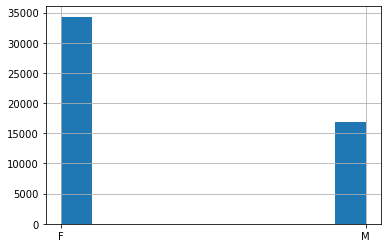

In [4]:

'''
this part deal with missing value of sex.
'''
tr.groupby('outcome').get_group(0)['SEX'].hist()

<AxesSubplot:>

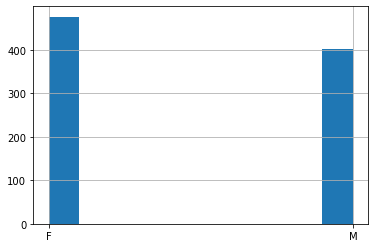

In [5]:
tr.groupby('outcome').get_group(1)['SEX'].hist()

In [6]:
#here, we consider missing value as a new attr
#because the dist of F M in outcome=1 or 0 are different

In [7]:
tr = pd.get_dummies(tr)

In [8]:
tr[['elx_index']].value_counts()

elx_index
0            29700
1             9366
2             6165
3             3474
4             1768
5              898
6              463
7              187
8               74
9               32
10              18
11               9
12               2
13               1
dtype: int64

In [9]:
#Joint has no missing value

tr = pd.get_dummies(tr)
tr.dtypes.value_counts()

int64      43
float64    23
uint8       4
dtype: int64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

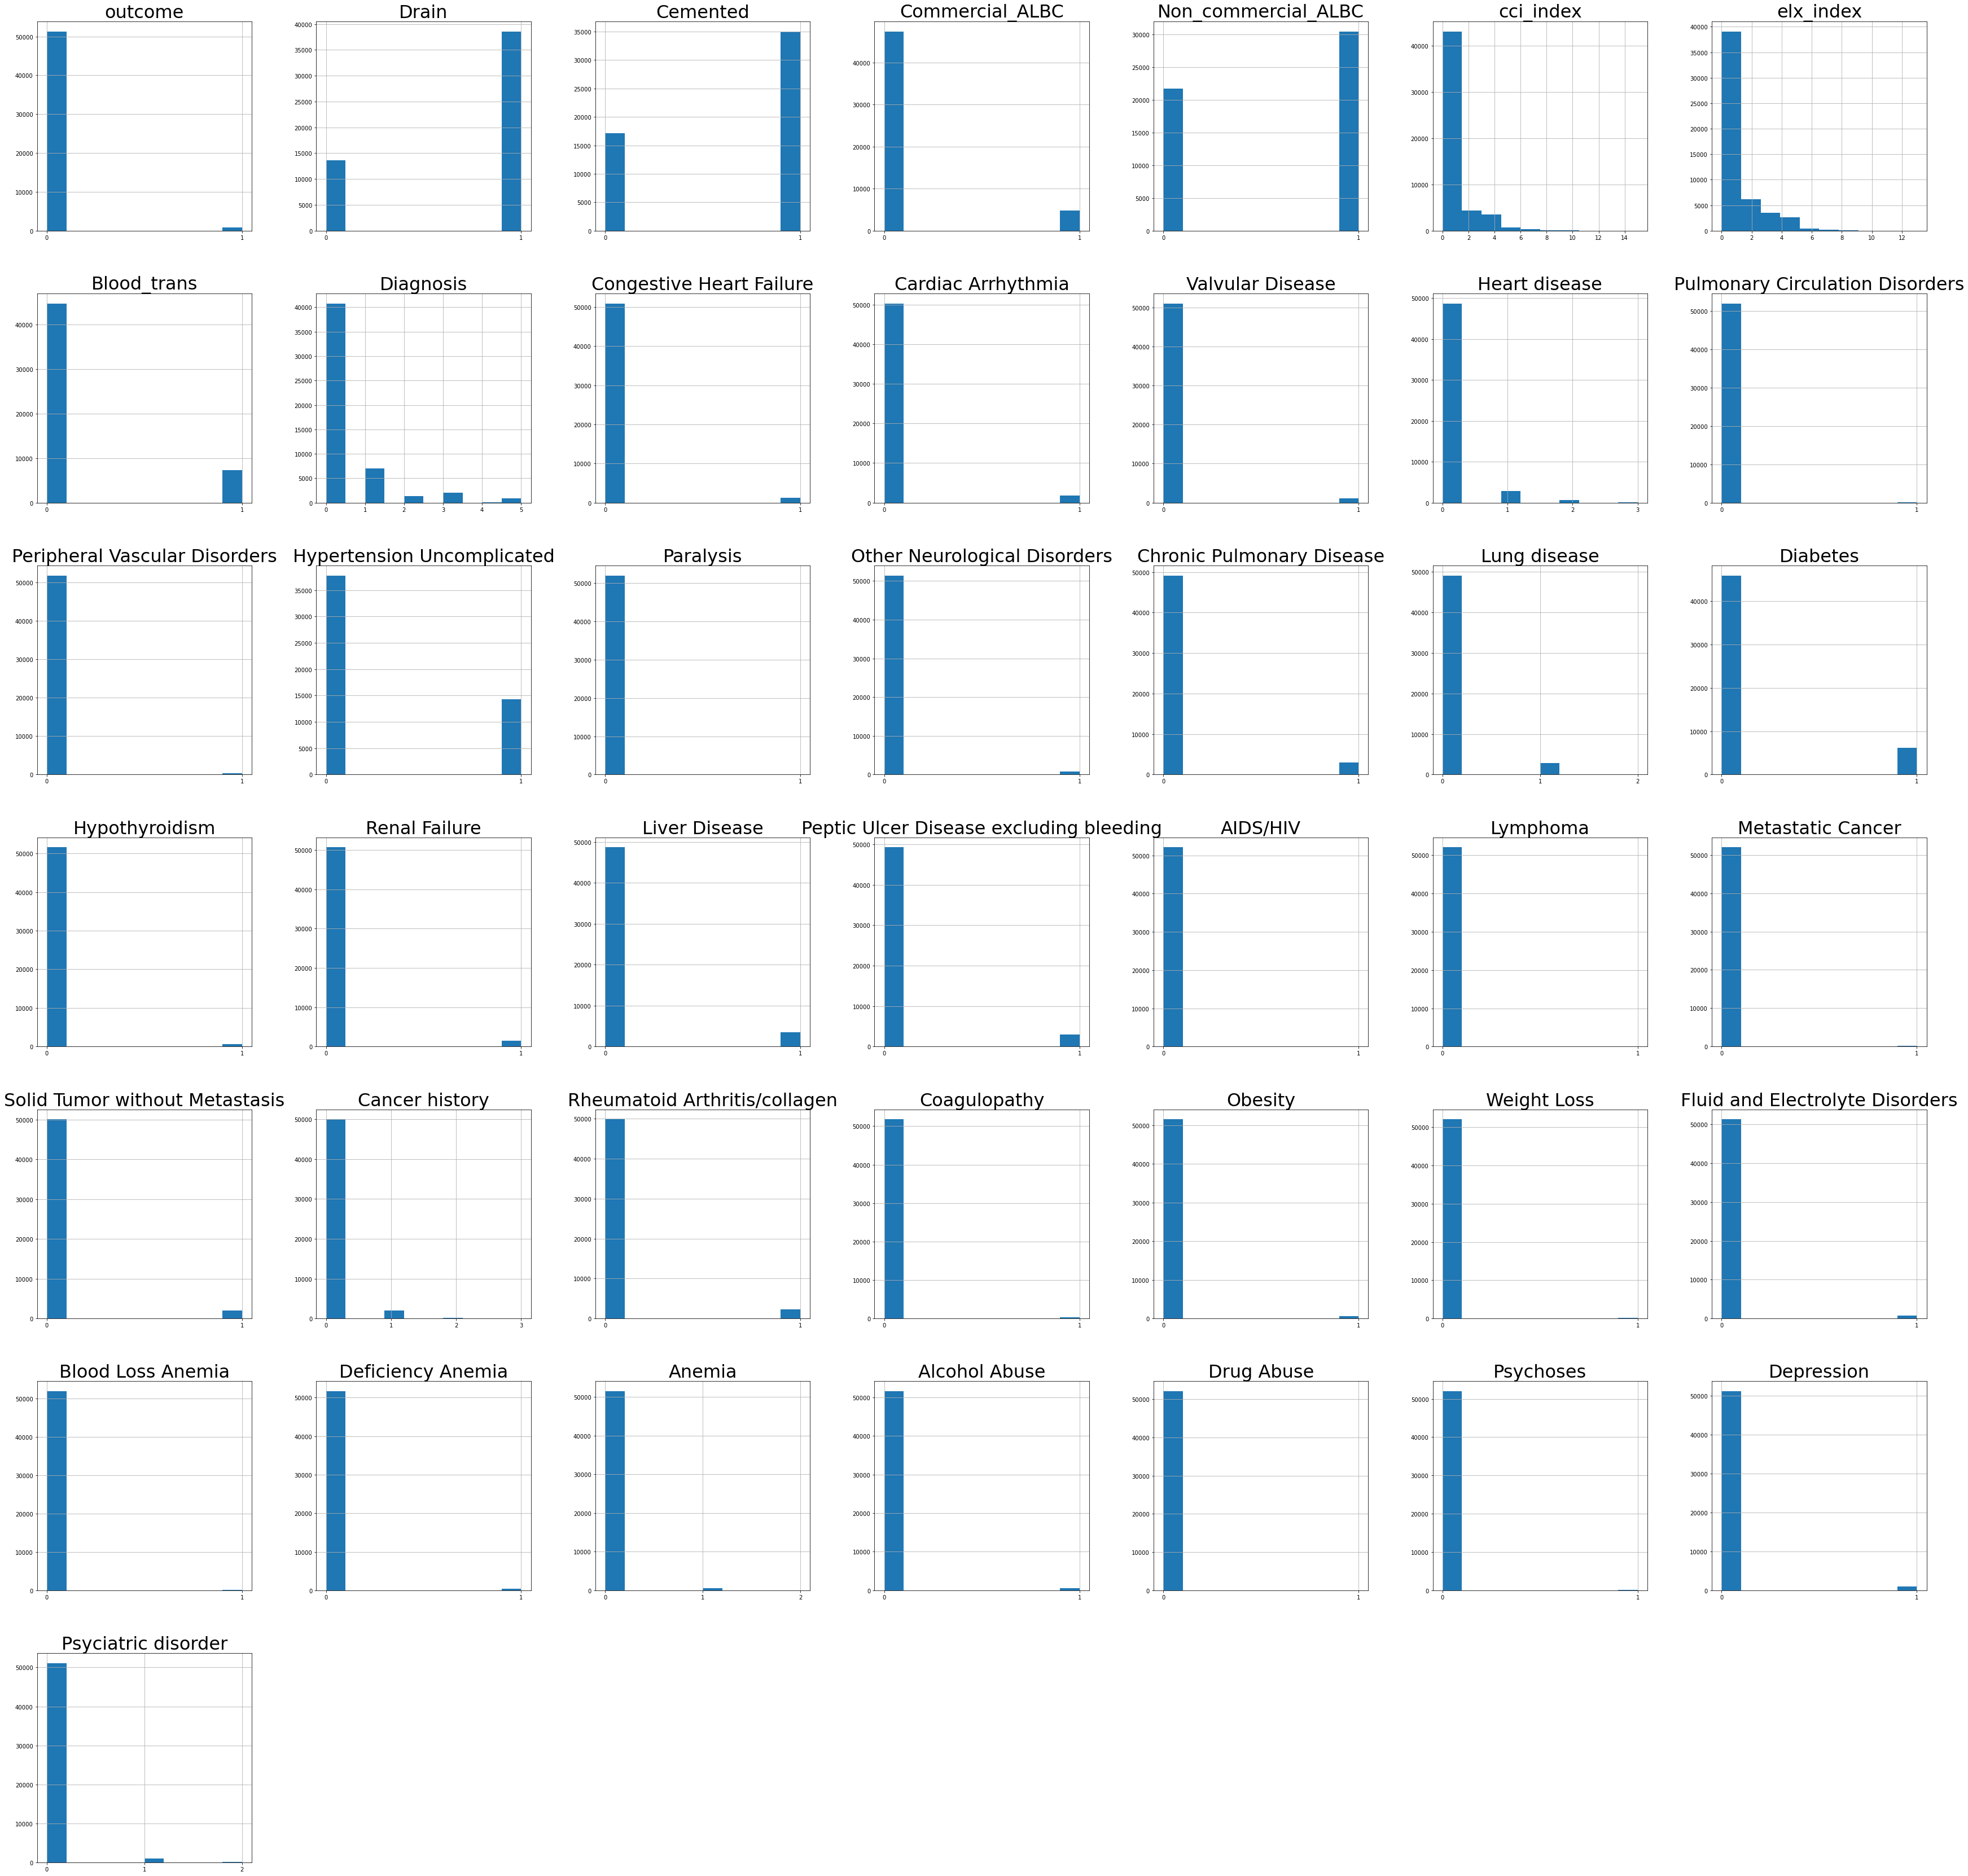

In [10]:
fig = tr.select_dtypes('int64').hist(figsize=(60, 60))
[x.title.set_size(32) for x in fig.ravel()]
[x.xaxis.get_major_locator().set_params(integer=True) for x in fig.ravel()]

In [11]:
column_need_onehot = ['Diagnosis', 'Heart disease', 'Lung disease', 'Cancer history', 'Anemia', 'Psyciatric disorder']
confuse = ['cci_index', 'elx_index']
tr[column_need_onehot] = tr[column_need_onehot].astype('object')
tr = pd.get_dummies(tr)
tr.columns


Index(['outcome', 'AGE', 'LOS', 'Drain', 'Cemented', 'Commercial_ALBC',
       'Non_commercial_ALBC', 'cci_index', 'elx_index', 'Blood_trans',
       'OP_time_minute', 'OP_time_hour', 'ASA', 'CBC_WBC', 'CBC_RBC', 'CBC_HG',
       'CBC_HT', 'CBC_MCV', 'CBC_MCH', 'CBC_MCHC', 'CBC_RDW', 'CBC_Platelet',
       'CBC_RDWCV', 'BUN', 'Crea', 'GOT', 'GPT', 'ALB', 'Na', 'K', 'UA',
       'Congestive Heart Failure', 'Cardiac Arrhythmia', 'Valvular Disease',
       'Pulmonary Circulation Disorders', 'Peripheral Vascular Disorders',
       'Hypertension Uncomplicated', 'Paralysis',
       'Other Neurological Disorders', 'Chronic Pulmonary Disease', 'Diabetes',
       'Hypothyroidism', 'Renal Failure', 'Liver Disease',
       'Peptic Ulcer Disease excluding bleeding', 'AIDS/HIV', 'Lymphoma',
       'Metastatic Cancer', 'Solid Tumor without Metastasis',
       'Rheumatoid Arthritis/collagen', 'Coagulopathy', 'Obesity',
       'Weight Loss', 'Fluid and Electrolyte Disorders', 'Blood Loss Anemia',
    

#### elx_index

In [12]:
tr.elx_index.value_counts
new_elx = pd.get_dummies(pd.cut(tr['elx_index'], bins=6))
new_elx.columns = ['elx1', 'elx2', 'elx3', 'elx4', 'elx5', 'elx6']
new_elx.columns

Index(['elx1', 'elx2', 'elx3', 'elx4', 'elx5', 'elx6'], dtype='object')

In [16]:
tr = pd.concat((tr, new_elx), axis=1)
tr.drop(columns='elx_index', inplace=True)


#### cci_index

In [17]:
print(tr.cci_index.value_counts())
new_elx = pd.get_dummies(pd.cut(tr['cci_index'], bins=[-1, 0, 4, 7, 12, 15]))#5 class
new_elx.columns = ['cci1', 'cci2', 'cci3', 'cci4', 'cci5']
# 發現芬香的表現稍微好了點
# 測試一下直接onehot



0     35002
1      8003
2      4343
3      2301
4      1171
5       656
6       289
8       131
7       117
9        84
10       28
11       13
12       12
13        4
14        2
15        1
Name: cci_index, dtype: int64


In [18]:
tr = pd.concat((tr, new_elx), axis=1)
tr.drop(columns='cci_index', inplace=True)

In [19]:
col = tr.select_dtypes('uint8').columns
tr[col] = tr[col].astype('int')
col = tr.select_dtypes('int').columns
tr[col] = tr[col].astype('object')

In [20]:
tr.dtypes.value_counts()

object     73
float64    23
dtype: int64

### 2. ordered attr
we can decide the value which will be inserted into the column by the dist of column.</br>
deal with AGE and LOS 


74.0


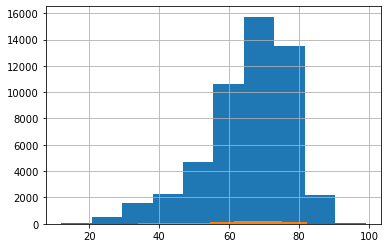

In [21]:
#first, AGE
'''
we first check the dist og age
'''
tr.groupby('outcome').get_group(0)['AGE'].hist()
tr.groupby('outcome').get_group(1)['AGE'].hist()
#it is a skewed dist
#we fill in the missing value with mode

imputation_0 = tr.groupby('outcome').get_group(0)['AGE'].mode().iloc[0]
print(imputation_0)

67.0


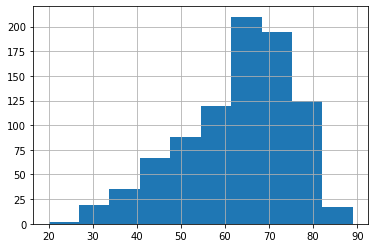

In [22]:
tr.groupby('outcome').get_group(1)['AGE'].hist()

imputation_1 = tr.groupby('outcome').get_group(1)['AGE'].mode().iloc[0]
print(imputation_1)

In [23]:
tr['AGE'] = tr.groupby(['outcome'])['AGE'].apply(lambda x: x.fillna(int(x.mode())))
tr['AGE'].isnull().sum()

0

5.591294494588364
7.266818700114025


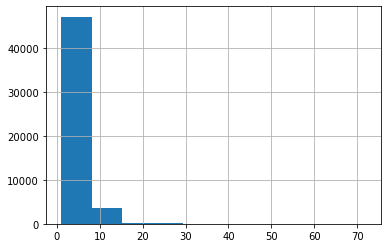

In [24]:
#second LOS
'''
here, since  
we first check the dist of LOS
'''
tr.groupby('outcome').get_group(0)['LOS'].hist()

#it is a skewed dist
#we fill in the missing value with mean

imputation_0 = tr.groupby('outcome').get_group(0)['LOS'].mean()
print(imputation_0)
imputation_1 = tr.groupby('outcome').get_group(1)['LOS'].mean()
print(imputation_1)

group outcome=0


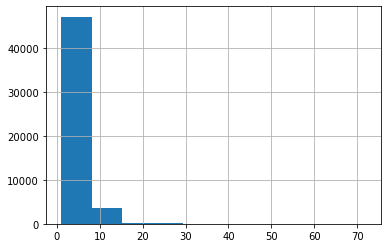

In [46]:

tr.groupby('outcome').get_group(0)['LOS'].hist()
print('group outcome=0')

<AxesSubplot:>

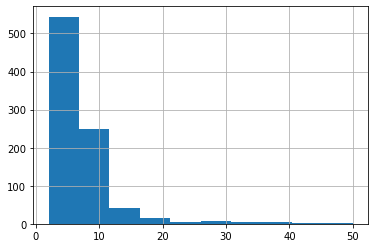

In [25]:
tr.groupby('outcome').get_group(1)['LOS'].hist()

In [26]:
tr['LOS'] = tr.groupby(['outcome'])['LOS'].apply(lambda x: x.fillna(x.mean()))

In [27]:
imputation = tr['LOS'].mode().iloc[0]
tr['LOS'].fillna(value=imputation, inplace=True)

In [28]:
tr['LOS'].isnull().sum()

0

In [29]:
tr.dtypes.value_counts()

object     73
float64    23
dtype: int64

### 3. continous attr
its time to deal with continous data</br>
OP_time_minute=>17161</br>
OP_time_hour=>17161</br>
ASA=>17213</br>
CBC_WBC=>32732</br>
CBC_RBC=>32760</br>
CBC_HG=>24406</br>
CBC_HT=>24523</br>
CBC_MCV=>32781</br>
CBC_MCH=>32768</br>
CBC_MCHC=>32771</br>
CBC_RDW=>32776</br>
CBC_Platelet=>32586</br>
CBC_RDWCV=>45544</br>
BUN=>25038</br>
Crea=>27011</br>
GOT=>26264</br>
GPT=>31293</br>
ALB=>33871</br>
Na=>33246</br>
K=>32974</br>
UA=>36423</br>

In [30]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import minmax_scale

new_tr = minmax_scale(tr.select_dtypes('float'))

In [31]:
#deal with commensurate in float attr(including ordinal attr)
float_col = tr.select_dtypes('float').columns
float_df = pd.DataFrame(new_tr, columns=float_col)
tr[float_col] = float_df
tr.select_dtypes('float').describe()

,AGE,LOS,OP_time_minute,OP_time_hour,ASA,CBC_WBC,CBC_RBC,CBC_HG,CBC_HT,CBC_MCV,...,CBC_Platelet,CBC_RDWCV,BUN,Crea,GOT,GPT,ALB,Na,K,UA
count,52157.000000,52157.000000,32051.000000,32051.000000,31999.000000,16407.000000,16379.000000,24733.000000,24616.000000,16358.000000,...,16553.000000,3595.000000,24101.000000,22128.000000,22876.000000,17846.000000,15268.000000,15893.000000,16165.000000,12716.000000
mean,0.612857,0.065064,0.250478,0.250478,0.471463,0.034335,0.419651,0.644180,0.512726,0.559675,...,0.230634,0.153919,0.121058,0.091409,0.056307,0.049671,0.604351,0.813507,0.458308,0.321268
std,0.140334,0.040692,0.080228,0.080228,0.181867,0.013622,0.087920,0.093778,0.138774,0.092300,...,0.070663,0.084019,0.053770,0.052985,0.041045,0.044304,0.153335,0.021573,0.127281,0.102946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.540230,0.042254,0.193613,0.193613,0.333333,0.026614,0.365105,0.582474,0.419355,0.532895,...,0.187417,0.102384,0.089796,0.046268,0.037611,0.027778,0.469062,0.803016,0.343053,0.251701
50%,0.643678,0.056338,0.243513,0.243513,0.333333,0.032843,0.415186,0.649485,0.524194,0.572368,...,0.225330,0.137447,0.111399,0.102406,0.046460,0.037698,0.640719,0.816601,0.490566,0.314059
75%,0.712644,0.084507,0.297405,0.297405,0.666667,0.040204,0.468498,0.706186,0.607527,0.610526,...,0.268368,0.179523,0.140203,0.117212,0.059735,0.055556,0.740519,0.823394,0.554031,0.382086
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
tr.select_dtypes('float').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,52157.0,0.612857,0.140334,0.0,0.540230,0.643678,0.712644,1.0
LOS,52157.0,0.065064,0.040692,0.0,0.042254,0.056338,0.084507,1.0
OP_time_minute,32051.0,0.250478,0.080228,0.0,0.193613,0.243513,0.297405,1.0
OP_time_hour,32051.0,0.250478,0.080228,0.0,0.193613,0.243513,0.297405,1.0
ASA,31999.0,0.471463,0.181867,0.0,0.333333,0.333333,0.666667,1.0
CBC_WBC,16407.0,0.034335,0.013622,0.0,0.026614,0.032843,0.040204,1.0
CBC_RBC,16379.0,0.419651,0.087920,0.0,0.365105,0.415186,0.468498,1.0
CBC_HG,24733.0,0.644180,0.093778,0.0,0.582474,0.649485,0.706186,1.0
CBC_HT,24616.0,0.512726,0.138774,0.0,0.419355,0.524194,0.607527,1.0
CBC_MCV,16358.0,0.559675,0.092300,0.0,0.532895,0.572368,0.610526,1.0


In [ ]:
#deal with continous attr
imputer = KNNImputer(n_neighbors=15)
new_tr = imputer.fit_transform(tr)

In [ ]:
tr[tr.columns] = new_tr

In [ ]:
obj_col = tr.columns.drop(float_col)
len(obj_col)

In [ ]:
tr[obj_col] = tr[obj_col].astype('object')
tr.dtypes.value_counts()

In [ ]:
tr.isnull().sum().sum()#it should be zero.

### finally save the outcome

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('./temp/2_data_imputation_onehot.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
tr.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()